In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#cr = pd.read_csv('US_Crime_DataSet.csv')
data1 = pd.read_csv("dataset1.csv")
data2 = pd.read_csv("dataset2.csv")
cr = pd.concat([data1, data2], ignore_index=True)

# note that column 16 is 'Perpetrator Age' with Dtype 'object'. Below it is to be changed to numeric

/tmp/ipykernel_12115/8041877.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv("dataset2.csv")


In [3]:
cr = pd.DataFrame(cr)

In [4]:
cr.shape

(638454, 24)

In [5]:
cr.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [6]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int64 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

In [7]:
# Strip whitespace from all string columns
cr = cr.apply(lambda col: col.str.strip() if col.dtypes == 'object' else col)

In [8]:
cr.describe()

,Record ID,Year,Incident,Victim Age,Victim Count,Perpetrator Count
count,638454.00000,638454.000000,638454.000000,638454.000000,638454.000000,638454.000000
mean,319227.50000,1995.801102,22.967924,35.033512,0.123334,0.185224
std,184305.93872,9.927693,92.149821,41.628306,0.537733,0.585496
min,1.00000,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,159614.25000,1987.000000,1.000000,22.000000,0.000000,0.000000
50%,319227.50000,1995.000000,2.000000,30.000000,0.000000,0.000000
75%,478840.75000,2004.000000,10.000000,42.000000,0.000000,0.000000
max,638454.00000,2014.000000,999.000000,998.000000,10.000000,10.000000


In [9]:
# Define the mapping for weapon categories
weapon_mapping = {
    'Blunt Object': 'Non-Firearm',
    'Strangulation': 'Non-Firearm',
    'Unknown': 'Unknown',
    'Rifle': 'Firearm',
    'Knife': 'Non-Firearm',
    'Firearm': 'Firearm',
    'Shotgun': 'Firearm',
    'Fall': 'Non-Firearm',
    'Handgun': 'Firearm',
    'Drowning': 'Non-Firearm',
    'Suffocation': 'Non-Firearm',
    'Explosives': 'Non-Firearm',
    'Fire': 'Non-Firearm',
    'Drugs': 'Non-Firearm',
    'Gun': 'Firearm',
    'Poison': 'Non-Firearm'
}

# Apply the mapping to create a new column for weapon categories
cr['Weapon Category'] = cr['Weapon'].replace(weapon_mapping)

In [10]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int64 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

In [11]:
# Define the mapping of relationships into broader categories
relationship_mapping = {
    'Acquaintance': 'Acquaintance',
    'Friend': 'Acquaintance',
    'Neighbor': 'Acquaintance',
    'Employer': 'Acquaintance',
    'Employee': 'Acquaintance',
   
    'Stranger': 'Stranger',
   
    'Wife': 'Lover',
    'Husband': 'Lover',
    'Girlfriend': 'Lover',
    'Boyfriend': 'Lover',
    'Ex-Husband': 'Lover',
    'Ex-Wife': 'Lover',
    'Common-Law Husband': 'Lover',
    'Common-Law Wife': 'Lover',
    'Boyfriend/Girlfriend': 'Lover',
   
    'Brother': 'Family',
    'Sister': 'Family',
    'Stepdaughter': 'Family',
    'Son': 'Family',
    'Daughter': 'Family',
    'Father': 'Family',
    'Mother': 'Family',
    'Stepmother': 'Family',
    'Stepfather': 'Family',
    'Stepson': 'Family',
    'Family': 'Family',
    'In-Law' : 'Family',
}

# Apply the mapping to create a new column with broader relationship categories
cr['Relationship Category'] = cr['Relationship'].replace(relationship_mapping)

In [12]:
# list columns to convert to numeric
int_columns = ['Perpetrator Age']

# Convert column to integer, handling invalid entries
for col in int_columns:
    cr[col] = pd.to_numeric(cr[col], errors='coerce') # convert invalid values to NaN

cr[col] = cr[col].fillna(0).astype(int) # Replace NaN with 0 and convert to integer

In [13]:
# list columns to convert to categorical
categ_columns = ['Agency Code','Agency Name','Agency Type','City','State','Year','Month','Crime Type','Crime Solved','Victim Sex','Victim Race','Victim Ethnicity','Perpetrator Sex','Perpetrator Race','Perpetrator Ethnicity','Relationship','Weapon','Record Source']

# convert columns to categorical
cr[categ_columns] = cr[categ_columns].astype('category')

In [14]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Record ID              638454 non-null  int64   
 1   Agency Code            638454 non-null  category
 2   Agency Name            638454 non-null  category
 3   Agency Type            638454 non-null  category
 4   City                   638454 non-null  category
 5   State                  638454 non-null  category
 6   Year                   638454 non-null  category
 7   Month                  638454 non-null  category
 8   Incident               638454 non-null  int64   
 9   Crime Type             638454 non-null  category
 10  Crime Solved           638454 non-null  category
 11  Victim Sex             638454 non-null  category
 12  Victim Age             638454 non-null  int64   
 13  Victim Race            638454 non-null  category
 14  Victim Ethnicity    

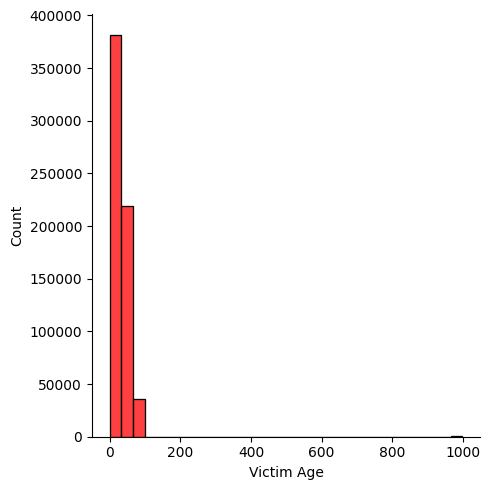

In [15]:
sns.displot(cr['Victim Age'],kde=False,color='r',kind='hist',bins=30)

In [16]:
print(cr)

        Record ID Agency Code      Agency Name       Agency Type        City  \
0               1     AK00101        Anchorage  Municipal Police   Anchorage   
1               2     AK00101        Anchorage  Municipal Police   Anchorage   
2               3     AK00101        Anchorage  Municipal Police   Anchorage   
3               4     AK00101        Anchorage  Municipal Police   Anchorage   
4               5     AK00101        Anchorage  Municipal Police   Anchorage   
...           ...         ...              ...               ...         ...   
638449     638450     WY01500      Park County           Sheriff        Park   
638450     638451     WY01700  Sheridan County           Sheriff    Sheridan   
638451     638452     WY01701         Sheridan  Municipal Police    Sheridan   
638452     638453     WY01800  Sublette County           Sheriff    Sublette   
638453     638454     WY01902     Rock Springs  Municipal Police  Sweetwater   

          State  Year      Month  Incid

<Axes: xlabel='Year', ylabel='count'>

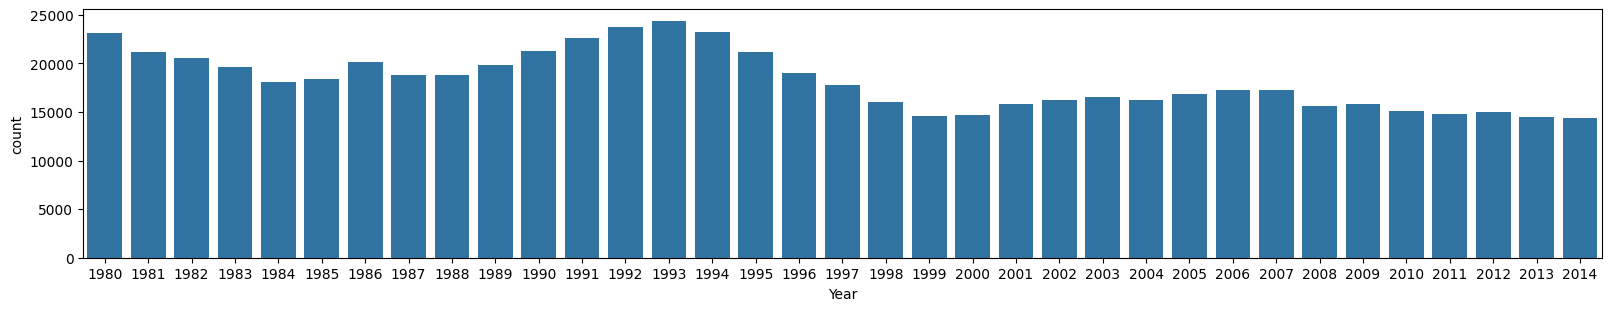

In [17]:
# data on the full dataset
plt.figure(figsize=(16,3), layout='constrained')
sns.countplot(x='Year',data=cr) # note dataset used i.e. cr

In [18]:
# Count of Crime Solved vs Unsolved
cr['Incident'].value_counts().nlargest(200)

Incident
1      265528
2       71779
3       39236
4       27113
5       20658
        ...  
195        33
196        32
197        32
198        31
202        30
Name: count, Length: 200, dtype: int64

In [19]:
# data on the full dataset

# agency type - almost all agency type (around 480k is municipal police and around another 100k is sheriff) - could be dropped
# city - there are over 1782 cities with the largest being LA (44.5k), NY (38.4k), Cook (22.4k), Wayne (19.9k), Harris (16.3k).
## city could be dropped and we keep state.
# State - 51 states with largest being California (99.8k), Texas (62.1k), NY (49.3k), Florida (37.2k), Michigan (28.4k).
# Year - changed the data type from integer to category.
# Month - distribution is very even across months, ranging from 46079 crimes in February to 58696 in July.
## month could be a target variable as well
# victim race - not too many unknowns
# victim ethnicity - Over 350,000 counts of unknowns
# weapon - unkown less than 35,000.
## weapon could be the target variable and the number of categories could be reduced.
# perpetrator sex - unkown around 200,000
# perpetrator ethnicity - over 400,000 unkowns
# perpetrator race - around 200,000 unknowns
# relationships - a large number of unknowns i.e. 273013
## could be grouped into acquaintance (a person one knows slightly, but who is not a close friend), stranger, friends (incl employee,  
## employer, neighbours), family (linked by blood or by love, incl. exs, bfs & gfs)
# Crime solved - around 200,000 no and over 400,000 yes
# Crime type - could be dropped - over 600,000 crimes by 'murder or manslaughter' & a little 'manslaughter by negligence'.

In [20]:
# FOCUS ON CRIMES SOLVED

In [21]:
# Focus on filtered dataset - Crime Solved is 'Yes'
filt_cr = cr[cr['Crime Solved'] == 'Yes']
print("Filtered Dataset - Crime Solved is 'Yes'")
print(filt_cr['Crime Solved'].value_counts())

Filtered Dataset - Crime Solved is 'Yes'
Crime Solved
Yes    448172
No          0
Name: count, dtype: int64


In [22]:
# NUMERICAL VARIABLES

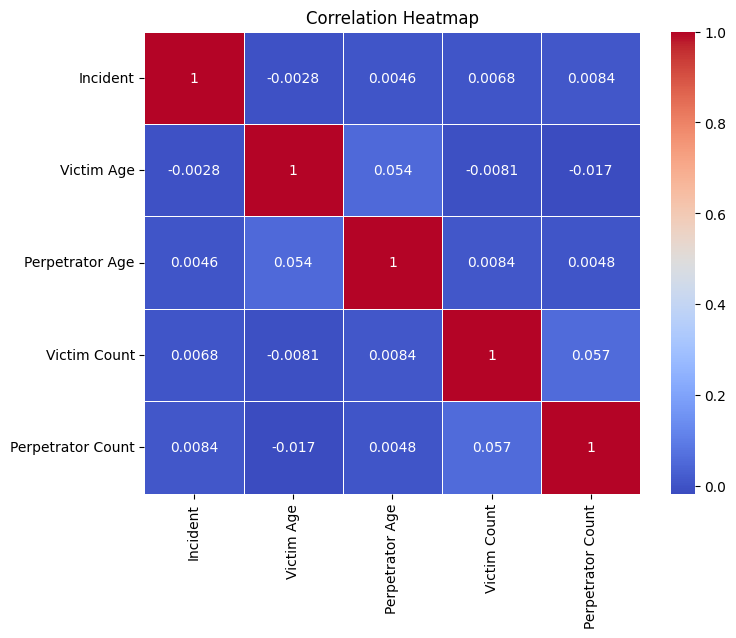

In [23]:
# create numerical variables subset
num_subset = filt_cr[['Incident', 'Victim Age', 'Perpetrator Age', 'Victim Count', 'Perpetrator Count']]

# calculate the correlation subset
corr_num_subset = num_subset.dropna().corr()

# plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_num_subset, annot=True, linewidth=0.5, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [24]:
# from above note the low correlation between numerical variables.

In [25]:
# numerical variables such as perpetrator count and incident which we may have difficulty understanding, we should remove. What do these
## two mean exactly?

In [26]:
# CATEGORICAL VARIABLES

In [27]:
# Count of selected variable or sum of count. Choose appropriate option:
filt_cr['Agency Type'].value_counts()
## filt_cr['Year'].value_counts().nlargest(100)
## filt_cr['Year'].value_counts().sum()


Agency Type
Municipal Police    336009
Sheriff              82994
County Police        15160
State Police         11715
Special Police        2058
Regional Police        186
Tribal Police           50
Name: count, dtype: int64

In [28]:
# data on the filtered dataset filt_cr

# agency type - almost all agency type (around 336k is municipal police and around another 83kk is sheriff) - could be dropped
# city - there are over 1782 cities with the largest being LA (26.7k), NY (19.2k), Cook (13.3k), Harris (13.1k), Wayne (12.7k).
## city could be dropped and we keep state.
# State - 51 states with largest being California (63.4k), Texas (47.4k), NY (26.7k), Florida (26.5k), Michigan (19.0k).
# Year - changed the data type from integer to category.
# Month - distribution is very even across months, ranging from 33258 crimes in February to 41468 in July.
## month could be a target variable as well
# victim sex - 337.6k male, 110.3k female, 331 unknown.
# victim race - not too many unknowns (3.6k)
# victim ethnicity - Over 255,000 counts of unknowns - could be reduced using cross tab
# weapon - unkown less than 18.5k.
## weapon could be the target variable and the number of categories could be reduced. Maybe two categories i.e. guns, fire & explosion vs
## close encounters
# perpetrator sex - 399.5k male, 48.5k female, 147 unknown.
# perpetrator ethnicity - around 256k unkowns - could be reduced using cross tab
# perpetrator race - around 6k unknowns
# relationships - a large number of unknowns i.e. 94.9k (we could create groups and then make cross tabs)
## could be grouped into acquaintance (a person one knows slightly, but who is not a close friend), stranger, friends (incl employee,  
## employer, neighbours), family (linked by blood or by love, incl. exs, bfs & gfs)
# Crime solved - filtered as yes and the full dataset is of 448.1k
# Crime type - over 600,000 crimes by 'murder or manslaughter' & a little 'manslaughter by negligence'.
## could be dropped 
# Record Source: FBI (191k) & FOIA only 625
## drop

In [29]:
# Step 1: Extract relevant columns
cr_vict_subset = filt_cr[['Victim Race','Victim Ethnicity']].copy()

In [30]:
vict = cr_vict_subset[['Victim Race','Victim Ethnicity']].apply(lambda col: col.unique())
print("Categories for each variable:")
print(vict)

Categories for each variable:
Victim Race         ['Native American/Alaska Native', 'White', 'Bl...
Victim Ethnicity    ['Unknown', 'Not Hispanic', 'Hispanic']
Catego...
dtype: object


In [31]:
# Step 2: Replace 'unknown' with NaN for easier processing
cr_vict_subset.replace('Unknown', np.nan, inplace=True)

In [32]:
# Step 2a: Calculate conditional probabilities
# Cross-tabulation of race and ethnicity
prob_vict_ethn_given_race = pd.crosstab(cr_vict_subset['Victim Race'], cr_vict_subset['Victim Ethnicity'], normalize='index')
prob_vict_race_given_ethnicity = pd.crosstab(cr_vict_subset['Victim Ethnicity'], cr_vict_subset['Victim Race'], normalize='columns')

print("\nConditional probabilities (Victim Ethnicity | Victim Race):")
print(prob_vict_ethn_given_race)

print("\nConditional probabilities (Victim Race | Victim Ethnicity):")
print(prob_vict_race_given_ethnicity)


Conditional probabilities (Victim Ethnicity | Victim Race):
Victim Ethnicity               Hispanic  Not Hispanic
Victim Race                                          
Asian/Pacific Islander         0.010816      0.989184
Black                          0.011816      0.988184
Native American/Alaska Native  0.004978      0.995022
White                          0.401055      0.598945

Conditional probabilities (Victim Race | Victim Ethnicity):
Victim Race       Asian/Pacific Islander     Black  \
Victim Ethnicity                                     
Hispanic                        0.010816  0.011816   
Not Hispanic                    0.989184  0.988184   

Victim Race       Native American/Alaska Native     White  
Victim Ethnicity                                           
Hispanic                               0.004978  0.401055  
Not Hispanic                           0.995022  0.598945  


In [33]:
# Step 3: Analyse missingness 
print("\nMissing values per column:")
print(cr_vict_subset.isnull().sum())

# Step 3: Analyse non-missingness
print("\nNo missing values per column:")
print(cr_vict_subset.notnull().sum())


Missing values per column:
Victim Race           3592
Victim Ethnicity    255032
dtype: int64

No missing values per column:
Victim Race         444580
Victim Ethnicity    193140
dtype: int64


In [34]:
# Step 4: Calculate conditional probabilities
# Cross-tabulation of race and ethnicity
prob_vict_ethn_given_race = pd.crosstab(cr_vict_subset['Victim Race'], cr_vict_subset['Victim Ethnicity'], normalize='index')
prob_vict_race_given_ethnicity = pd.crosstab(cr_vict_subset['Victim Ethnicity'], cr_vict_subset['Victim Race'], normalize='columns')

print("\nConditional probabilities (Victim Ethnicity | Victim Race):")
print(prob_vict_ethn_given_race)

print("\nConditional probabilities (Victim Race | Victim Ethnicity):")
print(prob_vict_race_given_ethnicity)


Conditional probabilities (Victim Ethnicity | Victim Race):
Victim Ethnicity               Hispanic  Not Hispanic
Victim Race                                          
Asian/Pacific Islander         0.010816      0.989184
Black                          0.011816      0.988184
Native American/Alaska Native  0.004978      0.995022
White                          0.401055      0.598945

Conditional probabilities (Victim Race | Victim Ethnicity):
Victim Race       Asian/Pacific Islander     Black  \
Victim Ethnicity                                     
Hispanic                        0.010816  0.011816   
Not Hispanic                    0.989184  0.988184   

Victim Race       Native American/Alaska Native     White  
Victim Ethnicity                                           
Hispanic                               0.004978  0.401055  
Not Hispanic                           0.995022  0.598945  


In [35]:
# Step 4a: Apply chi-square test for association between 2 categorical variables (victim race & ethnicity)
## If there is a significant association between variables we can impute missing values

In [36]:
from scipy.stats import chi2_contingency

In [37]:
# Consider creating a contingency table for perpetrator race and ethnicity
## If there is a significant association between variables we can impute missing values
### Key assumptions:
#### Data must be categorical
#### Expected frequency for each cell in the contingency table should be 5 or more for valid results. Else, combine categories or use Fisher's 
##### exact test for small sample sizes.

# Remove rows with unkowns
#filt_cr = filt_cr.dropna()
filt_cr = cr[(cr['Victim Race'] != 'Unknown') & (cr['Victim Ethnicity'] != 'Unknown')]

In [38]:
# Create a contingency table for victim race and ethnicity
contingency_table = pd.crosstab(filt_cr['Victim Race'], filt_cr['Victim Ethnicity'])

In [39]:
# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [40]:
# Display results
print("\nContingency Table:\n", contingency_table)
print("\nChi-square statistic:", chi2)
print("P-value", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)


Contingency Table:
 Victim Ethnicity               Hispanic  Not Hispanic
Victim Race                                          
Asian/Pacific Islander               52          5568
Black                              1213        100973
Native American/Alaska Native        11          2010
White                             71199         88778

Chi-square statistic: 62272.58294372772
P-value 0.0
Degrees of freedom: 3
Expected frequencies:
 [[  1509.64959749   4110.35040251]
 [ 27449.29782361  74736.70217639]
 [   542.88288906   1478.11711094]
 [ 42973.16968985 117003.83031015]]


In [41]:
# Interpretation
if p < 0.05:
    print("There is a significant association between the variables.")
else:
    print("There is no significant association between the variables.")

There is a significant association between the variables.


In [42]:
# Step 4b: Establish strength/degree of association
## Now that we establish that association is significant we need to establish strength of association
## Note that the variables are on a nominal scale and hence we could apply Cramer's V

# Calculate Cramer's V
n = contingency_table.to_numpy().sum() # total no. of observations
k, r = contingency_table.shape # dimensions of the table
cramers_v = np.sqrt(chi2 / (n * min(k - 1, r - 1)))

# Display results
print("Chi-square statistic:", chi2)
print("Cramer's V:", cramers_v)

# Interpretation of below:
## V < 0.1: Weak
## 0.1 ≤ V < 0.3: Moderate
## V > 0.3: Strong

# This sets the basis for imputing the missing values

Chi-square statistic: 62272.58294372772
Cramer's V: 0.4804235055528901


In [43]:
# Step 5: Impute missing values
## Function to impute Victim Ethnicity based on Victim Race
def impute_vict_ethnicity(row, prob_table):
    if pd.isnull(row['Victim Ethnicity']) and row ['Victim Race'] in prob_table.index:
        return np.random.choice(prob_table.columns, p=prob_table.loc[row['Victim Race']].values)
    return row['Victim Ethnicity']

## Function to impute Victim Race based on Victim Ethnicity
def impute_vict_race(row, prob_table):
    if pd.isnull(row['Victim Race']) and row ['Victim Ethnicity'] in prob_table.columns:
        return np.random.choice(prob_table.index, p=prob_table[row['Victim Ethnicity']].values)
    return row['Victim Race']

## Apply imputations
cr_vict_subset['Victim Ethnicity'] = cr_vict_subset.apply(impute_vict_ethnicity, axis=1, prob_table=prob_vict_ethn_given_race)
cr_vict_subset['Victim Race'] = cr_vict_subset.apply(impute_vict_race, axis=1, prob_table=prob_vict_race_given_ethnicity)

In [44]:
print(cr_vict_subset)

                          Victim Race Victim Ethnicity
0       Native American/Alaska Native     Not Hispanic
1                               White     Not Hispanic
3                               White     Not Hispanic
5                               White     Not Hispanic
6       Native American/Alaska Native         Hispanic
...                               ...              ...
638448  Native American/Alaska Native     Not Hispanic
638450                          White     Not Hispanic
638451         Asian/Pacific Islander     Not Hispanic
638452                          White     Not Hispanic
638453                          White     Not Hispanic

[448172 rows x 2 columns]


In [45]:
# Step 6: Update the original dataset
filt_cr[['Victim Race', 'Victim Ethnicity']] = cr_vict_subset.fillna('nan')
# print(cr[['Victim Race', 'Victim Ethnicity']])

/tmp/ipykernel_12115/3232450012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_cr[['Victim Race', 'Victim Ethnicity']] = cr_vict_subset.fillna('nan')


<Axes: xlabel='Victim Ethnicity', ylabel='count'>

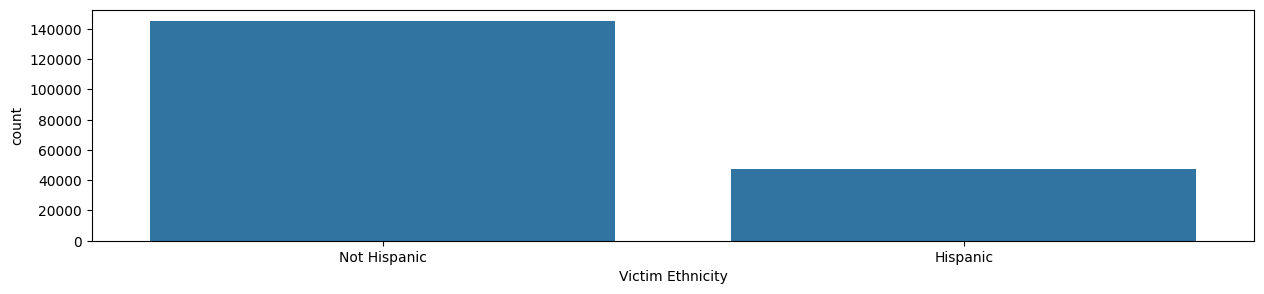

In [46]:
# Step 7: Visualization
plt.figure(figsize=(15,3))
sns.countplot(x='Victim Ethnicity',data=filt_cr) # note dataset used i.e. cr

In [47]:
# Step 8: Analyse missingness
print("\nMissing values per column:")
print(cr_vict_subset.isnull().sum())

# Step 8: Analyse non-missingness
print("\nNot missing values per column:")
print(cr_vict_subset.notnull().sum())


Missing values per column:
Victim Race         3592
Victim Ethnicity    3346
dtype: int64

Not missing values per column:
Victim Race         444580
Victim Ethnicity    444826
dtype: int64


In [48]:
# Step 9: Dealing with the remaining unknowns by distirbuting the unkown values across the categories based on calculated ratios
## apply only if needed!
# Calculate the proportions of known values
vict_ethn_ratios = filt_cr['Victim Ethnicity'][filt_cr['Victim Ethnicity'] != 'Unknown'].value_counts(normalize=True)
vict_race_ratios = filt_cr['Victim Race'][filt_cr['Victim Race'] != 'Unknown'].value_counts(normalize=True)

print("Victim Ethnicity Ratios:")
print(vict_ethn_ratios)

print("Victim Race Ratios:")
print(vict_race_ratios)

Victim Ethnicity Ratios:
Victim Ethnicity
Not Hispanic    0.754067
Hispanic        0.245933
Name: proportion, dtype: float64
Victim Race Ratios:
Victim Race
White                            0.601672
Black                            0.369866
Asian/Pacific Islander           0.020130
Native American/Alaska Native    0.008331
Name: proportion, dtype: float64


In [49]:
# Step 10: Distribute Unknowns
import random

def assign_category(value, ratios):
    """Assigns a category based on the given ratios."""
    if value == 'Unknown':
        return random.choices(ratios.index, weights=ratios.values, k=1)[0]
    return value

#Apply the function to fill in missing values
filt_cr['Victim Ethnicity'] = filt_cr['Victim Ethnicity'].apply(assign_category, ratios = vict_ethn_ratios)
filt_cr['Victim Race'] = filt_cr['Victim Race'].apply(assign_category, ratios = vict_race_ratios)

/tmp/ipykernel_12115/1380973275.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_cr['Victim Ethnicity'] = filt_cr['Victim Ethnicity'].apply(assign_category, ratios = vict_ethn_ratios)
/tmp/ipykernel_12115/1380973275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_cr['Victim Race'] = filt_cr['Victim Race'].apply(assign_category, ratios = vict_race_ratios)


In [50]:
# Step 11: Analyse missingness 
print("\nMissing values per column:")
print(filt_cr['Victim Ethnicity'].isnull().sum())
print(filt_cr['Victim Race'].isnull().sum())

print("\nNo missing values per column:")
print(filt_cr['Victim Ethnicity'].notnull().sum())
print(filt_cr['Victim Race'].notnull().sum())

# Note that no missing values matches the Filtered Dataset - Crime Solved is 'Yes'


Missing values per column:
76910
76910

No missing values per column:
192894
192894


In [51]:
# Step 1: Extract relevant columns
cr_perp_subset = filt_cr[['Perpetrator Race','Perpetrator Ethnicity']].copy()

In [52]:
perp = cr_perp_subset[['Perpetrator Race','Perpetrator Ethnicity']].apply(lambda col: col.unique())
print("Categories for each variable:")
print(perp)

Categories for each variable:
Perpetrator Race         ['Native American/Alaska Native', 'Black', 'Wh...
Perpetrator Ethnicity    ['Not Hispanic', 'Unknown', 'Hispanic']
Catego...
dtype: object


In [53]:
# Step 2: Replace 'unknown' with NaN for easier processing
cr_perp_subset.replace('Unknown', np.nan, inplace=True)

In [54]:
# Step 2a: Calculate conditional probabilities
# Cross-tabulation of race and ethnicity
prob_perp_ethn_given_race = pd.crosstab(cr_perp_subset['Perpetrator Race'], cr_perp_subset['Perpetrator Ethnicity'], normalize='index')
prob_perp_race_given_ethnicity = pd.crosstab(cr_perp_subset['Perpetrator Ethnicity'], cr_perp_subset['Perpetrator Race'], normalize='columns')

print("\nConditional probabilities (Perpetrator Ethnicity | Perpetrator Race):")
print(prob_perp_ethn_given_race)

print("\nConditional probabilities (Perpetrator Race | Perpetrator Ethnicity):")
print(prob_perp_race_given_ethnicity)


Conditional probabilities (Perpetrator Ethnicity | Perpetrator Race):
Perpetrator Ethnicity          Hispanic  Not Hispanic
Perpetrator Race                                     
Asian/Pacific Islander         0.013855      0.986145
Black                          0.010661      0.989339
Native American/Alaska Native  0.009715      0.990285
White                          0.414081      0.585919

Conditional probabilities (Perpetrator Race | Perpetrator Ethnicity):
Perpetrator Race       Asian/Pacific Islander     Black  \
Perpetrator Ethnicity                                     
Hispanic                             0.013855  0.010661   
Not Hispanic                         0.986145  0.989339   

Perpetrator Race       Native American/Alaska Native     White  
Perpetrator Ethnicity                                           
Hispanic                                    0.009715  0.414081  
Not Hispanic                                0.990285  0.585919  


In [55]:
# Step 3: Analyse missingness
print("\nMissing values per column:")
print(cr_perp_subset.isnull().sum())

# Step 3: Analyse non-missingness
print("\nNot missing values per column:")
print(cr_perp_subset.notnull().sum())


Missing values per column:
Perpetrator Race         78577
Perpetrator Ethnicity    79889
dtype: int64

Not missing values per column:
Perpetrator Race         191227
Perpetrator Ethnicity    189915
dtype: int64


In [56]:
# Step 4: Calculate conditional probabilities
# Cross-tabulation of race and ethnicity
prob_perp_ethn_given_race = pd.crosstab(cr_perp_subset['Perpetrator Race'], cr_perp_subset['Perpetrator Ethnicity'], normalize='index')
prob_perp_race_given_ethnicity = pd.crosstab(cr_perp_subset['Perpetrator Ethnicity'], cr_perp_subset['Perpetrator Race'], normalize='columns')

print("\nConditional probabilities (Perpetrator Ethnicity | Perpetrator Race):")
print(prob_perp_ethn_given_race)

print("\nConditional probabilities (Perpetrator Race | Perpetrator Ethnicity):")
print(prob_perp_race_given_ethnicity)


Conditional probabilities (Perpetrator Ethnicity | Perpetrator Race):
Perpetrator Ethnicity          Hispanic  Not Hispanic
Perpetrator Race                                     
Asian/Pacific Islander         0.013855      0.986145
Black                          0.010661      0.989339
Native American/Alaska Native  0.009715      0.990285
White                          0.414081      0.585919

Conditional probabilities (Perpetrator Race | Perpetrator Ethnicity):
Perpetrator Race       Asian/Pacific Islander     Black  \
Perpetrator Ethnicity                                     
Hispanic                             0.013855  0.010661   
Not Hispanic                         0.986145  0.989339   

Perpetrator Race       Native American/Alaska Native     White  
Perpetrator Ethnicity                                           
Hispanic                                    0.009715  0.414081  
Not Hispanic                                0.990285  0.585919  


In [57]:
# Consider creating a contingency table for perpetrator race and ethnicity
## If there is a significant association between variables we can impute missing values

# Remove rows with unkowns
#filt_cr = filt_cr.dropna()
filt_cr = cr[(cr['Perpetrator Race'] != 'Unknown') & (cr['Perpetrator Ethnicity'] != 'Unknown')]
contingency_table = pd.crosstab(filt_cr['Perpetrator Race'], filt_cr['Perpetrator Ethnicity'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display results
#print("Filtered DataFrame:\n", filt_cr)
print("\nContingency Table:\n", contingency_table)
print("\nChi-square statistic:", chi2)
print("P-value", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

# Interpretation
if p < 0.05:
    print("There is a significant association between the variables.")
else:
    print("There is no significant association between the variables.")


Contingency Table:
 Perpetrator Ethnicity          Hispanic  Not Hispanic
Perpetrator Race                                     
Asian/Pacific Islander               48          3316
Black                               875         75704
Native American/Alaska Native        17          1542
White                             45767         64206

Chi-square statistic: 41556.07610306301
P-value 0.0
Degrees of freedom: 3
Expected frequencies:
 [[  820.58936154  2543.41063846]
 [18680.11674109 57898.88325891]
 [  380.29096749  1178.70903251]
 [26826.00292989 83146.99707011]]
There is a significant association between the variables.


In [58]:
# Step 4b: Establish strength/degree of association
## Now that we establish that association is significant we need to establish strength of association
## Note that the variables are on a nominal scale and hence we could apply Cramer's V

# Calculate Cramer's V
n = contingency_table.to_numpy().sum() # total no. of observations
k, r = contingency_table.shape # dimensions of the table
cramers_v = np.sqrt(chi2 / (n * min(k - 1, r - 1)))

# Display results
print("Chi-square statistic:", chi2)
print("Cramer's V:", cramers_v)

# Interpretation of below:
## V < 0.1: Weak
## 0.1 ≤ V < 0.3: Moderate
## V > 0.3: Strong

# This sets the basis for imputing the missing values

Chi-square statistic: 41556.07610306301
Cramer's V: 0.4658662269840794


In [59]:
# Step 5: Impute missing values
## Function to impute Perpetrator Ethnicity based on Perpetrator Race
def impute_perp_ethnicity(row, prob_table):
    if pd.isnull(row['Perpetrator Ethnicity']) and row ['Perpetrator Race'] in prob_table.index:
        return np.random.choice(prob_table.columns, p=prob_table.loc[row['Perpetrator Race']].values)
    return row['Perpetrator Ethnicity']

## Function to impute Perpetrator Race based on Perpetrator Ethnicity
def impute_perp_race(row, prob_table):
    if pd.isnull(row['Perpetrator Race']) and row ['Perpetrator Ethnicity'] in prob_table.columns:
        return np.random.choice(prob_table.index, p=prob_table[row['Perpetrator Ethnicity']].values)
    return row['Perpetrator Race']

## Apply imputations
cr_perp_subset['Perpetrator Ethnicity'] = cr_perp_subset.apply(impute_perp_ethnicity, axis=1, prob_table=prob_perp_ethn_given_race)
cr_perp_subset['Perpetrator Race'] = cr_perp_subset.apply(impute_perp_race, axis=1, prob_table=prob_perp_race_given_ethnicity)

In [60]:
# Step 6: Update the original dataset
filt_cr[['Perpetrator Race', 'Perpetrator Ethnicity']] = cr_perp_subset.fillna('nan')
#print(cr[['Perpetrator Race', 'Perpetrator Ethnicity']])

/tmp/ipykernel_12115/573566724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_cr[['Perpetrator Race', 'Perpetrator Ethnicity']] = cr_perp_subset.fillna('nan')


<Axes: xlabel='Perpetrator Ethnicity', ylabel='count'>

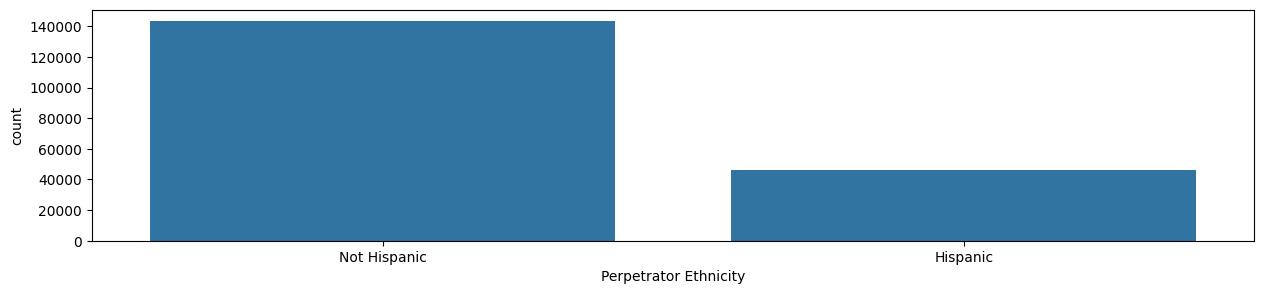

In [61]:
# Step 7: Visualization
plt.figure(figsize=(15,3))
sns.countplot(x='Perpetrator Ethnicity',data=filt_cr) # note dataset used i.e. cr

In [62]:
# Step 8: Analyse missingness
print("\nMissing values per column:")
print(cr_perp_subset.isnull().sum())

# Step 8: Analyse non-missingness
print("\nNot missing values per column:")
print(cr_perp_subset.notnull().sum())


Missing values per column:
Perpetrator Race         78577
Perpetrator Ethnicity    78167
dtype: int64

Not missing values per column:
Perpetrator Race         191227
Perpetrator Ethnicity    191637
dtype: int64


In [63]:
# Step 9: Dealing with the remaining unknowns by distirbuting the unkown values across the categories based on calculated ratios
# Calculate the proportions of known values
perp_ethn_ratios = filt_cr['Perpetrator Ethnicity'][cr['Perpetrator Ethnicity'] != 'Unknown'].value_counts(normalize=True)
perp_race_ratios = filt_cr['Perpetrator Race'][cr['Perpetrator Race'] != 'Unknown'].value_counts(normalize=True)

print("Perpetrator Ethnicity Ratios:")
print(perp_ethn_ratios)

print("Perpetrator Race Ratios:")
print(perp_race_ratios)

Perpetrator Ethnicity Ratios:
Perpetrator Ethnicity
Not Hispanic    0.757975
Hispanic        0.242025
Name: proportion, dtype: float64
Perpetrator Race Ratios:
Perpetrator Race
White                            0.573389
Black                            0.400945
Asian/Pacific Islander           0.017519
Native American/Alaska Native    0.008148
Name: proportion, dtype: float64


In [64]:
# Step 10: Distribute Unknowns
import random

def assign_category(value, ratios):
    """Assigns a category based on the given ratios."""
    if value == 'Unknown':
        return random.choices(ratios.index, weights=ratios.values, k=1)[0]
    return value

#Apply the function to fill in missing values
filt_cr['Perpetrator Ethnicity'] = filt_cr['Perpetrator Ethnicity'].apply(assign_category, ratios = perp_ethn_ratios)
filt_cr['Perpetrator Race'] = filt_cr['Perpetrator Race'].apply(assign_category, ratios = perp_race_ratios)

/tmp/ipykernel_12115/3907168526.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_cr['Perpetrator Ethnicity'] = filt_cr['Perpetrator Ethnicity'].apply(assign_category, ratios = perp_ethn_ratios)
/tmp/ipykernel_12115/3907168526.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_cr['Perpetrator Race'] = filt_cr['Perpetrator Race'].apply(assign_category, ratios = perp_race_ratios)


In [65]:
# Step 11: Analyse missingness 
print("\nMissing values per column:")
print(filt_cr['Perpetrator Ethnicity'].isnull().sum())
print(filt_cr['Perpetrator Race'].isnull().sum())

print("\nNo missing values per column:")
print(filt_cr['Perpetrator Ethnicity'].notnull().sum())
print(filt_cr['Perpetrator Race'].notnull().sum())

# Note that no missing values matches the Filtered Dataset - Crime Solved is 'Yes'


Missing values per column:
1970
1970

No missing values per column:
189505
189505


In [66]:
# list columns to convert to categorical
categ_columns = ['Agency Code','Agency Name','Agency Type','City','State','Year','Month','Crime Type','Crime Solved','Victim Sex','Victim Race','Victim Ethnicity','Perpetrator Sex','Perpetrator Race','Perpetrator Ethnicity','Relationship','Weapon','Record Source']

# convert columns to categorical
filt_cr[categ_columns] = filt_cr[categ_columns].astype('category')

/tmp/ipykernel_12115/1950331318.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_cr[categ_columns] = filt_cr[categ_columns].astype('category')


In [67]:
filt_cr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191475 entries, 44 to 638453
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Record ID              191475 non-null  int64   
 1   Agency Code            191475 non-null  category
 2   Agency Name            191475 non-null  category
 3   Agency Type            191475 non-null  category
 4   City                   191475 non-null  category
 5   State                  191475 non-null  category
 6   Year                   191475 non-null  category
 7   Month                  191475 non-null  category
 8   Incident               191475 non-null  int64   
 9   Crime Type             191475 non-null  category
 10  Crime Solved           191475 non-null  category
 11  Victim Sex             191475 non-null  category
 12  Victim Age             191475 non-null  int64   
 13  Victim Race            191475 non-null  category
 14  Victim Ethnicity       1

In [68]:
filt_cr.drop(['Record ID','Agency Code','Agency Name','Incident','City','Crime Type','Record Source','Perpetrator Count'],axis='columns', inplace=True)

/tmp/ipykernel_12115/2986074747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_cr.drop(['Record ID','Agency Code','Agency Name','Incident','City','Crime Type','Record Source','Perpetrator Count'],axis='columns', inplace=True)


In [69]:
#filt_cr.drop(['Agency Code','Crime Type'],axis='columns', inplace=True)

In [70]:
#filt_cr.drop(['Record Source'],axis='columns', inplace=True)

In [71]:
#filt_cr.drop(['Record ID','Agency Name'],axis='columns', inplace=True)

In [72]:
#filt_cr.drop(['Perpetrator Count'],axis='columns', inplace=True)

In [73]:
filt_cr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191475 entries, 44 to 638453
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Agency Type            191475 non-null  category
 1   State                  191475 non-null  category
 2   Year                   191475 non-null  category
 3   Month                  191475 non-null  category
 4   Crime Solved           191475 non-null  category
 5   Victim Sex             191475 non-null  category
 6   Victim Age             191475 non-null  int64   
 7   Victim Race            191475 non-null  category
 8   Victim Ethnicity       191475 non-null  category
 9   Perpetrator Sex        191475 non-null  category
 10  Perpetrator Age        191475 non-null  int64   
 11  Perpetrator Race       189505 non-null  category
 12  Perpetrator Ethnicity  189505 non-null  category
 13  Relationship           191475 non-null  category
 14  Weapon                 1

In [74]:
filt_cr.describe()
# note victim ages range from 0 to 998. The end points are both incorrect
# note that perpetrator age ranges from 0 to 93. The lower end point is incorrect.

,Victim Age,Perpetrator Age,Victim Count
count,191475.000000,191475.000000,191475.000000
mean,33.328842,1.077582,0.107382
std,23.725795,6.323988,0.480704
min,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000
50%,30.000000,0.000000,0.000000
75%,41.000000,0.000000,0.000000
max,998.000000,93.000000,10.000000


In [75]:
# data on the filtered dataset filt_cr

# agency type - almost all agency type (around 336k is municipal police and around another 83kk is sheriff) - could be dropped
# State - 51 states with largest being California (63.4k), Texas (47.4k), NY (26.7k), Florida (26.5k), Michigan (19.0k).
# Year - changed the data type from integer to category.
# Month - distribution is very even across months, ranging from 33258 crimes in February to 41468 in July.
# victim sex - 337.6k male, 110.3k female, 331 unknown.
# victim race - not too many unknowns (3.6k)
# victim ethnicity - Over 255,000 counts of unknowns - could be reduced using cross tab
# weapon - unkown less than 18.5k.
## weapon could be the target variable and the number of categories could be reduced. Maybe two categories i.e. guns, fire & explosion vs
## close encounters
# perpetrator sex - 399.5k male, 48.5k female, 147 unknown.
# perpetrator ethnicity - around 256k unkowns - could be reduced using cross tab
# perpetrator race - around 6k unknowns
# relationships - a large number of unknowns i.e. 94.9k (we could create groups and then make cross tabs)
## could be grouped into acquaintance (a person one knows slightly, but who is not a close friend), stranger, friends (incl employee,  
## employer, neighbours), family (linked by blood or by love, incl. exs, bfs & gfs)
# Crime solved - filtered as yes and the full dataset is of 448.1k

In [76]:
# Count of selected variable or sum of count. Choose appropriate option:
filt_cr['Agency Type'].value_counts()
## filt_cr['Year'].value_counts().nlargest(100)
## filt_cr['Year'].value_counts().sum()

Agency Type
Municipal Police    147054
Sheriff              36764
State Police          3589
County Police         3443
Special Police         506
Regional Police        110
Tribal Police            9
Name: count, dtype: int64

In [77]:
# Creation of the 'Other Police' category to group small categories
# set threshold to group small categories
threshold = 6000

# Get the counts of each category
category_counts = filt_cr['Agency Type'].value_counts()

# Create a new column with 'Other Police' for categories below the threshold
filt_cr['Agency_Type_grouped'] = filt_cr['Agency Type'].apply(lambda x: x if category_counts[x] >= threshold else 'Other Police')

/tmp/ipykernel_12115/1424856505.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_cr['Agency_Type_grouped'] = filt_cr['Agency Type'].apply(lambda x: x if category_counts[x] >= threshold else 'Other Police')


In [78]:
# Count of selected variable or sum of count. Choose appropriate option:
filt_cr['Agency_Type_grouped'].value_counts()
## filt_cr['Year'].value_counts().nlargest(100)
## filt_cr['Year'].value_counts().sum()

Agency_Type_grouped
Municipal Police    147054
Sheriff              36764
Other Police          7657
Name: count, dtype: int64

In [79]:
print(filt_cr.notnull().sum()) # use notnull or isnull

Agency Type              191475
State                    191475
Year                     191475
Month                    191475
Crime Solved             191475
Victim Sex               191475
Victim Age               191475
Victim Race              191475
Victim Ethnicity         191475
Perpetrator Sex          191475
Perpetrator Age          191475
Perpetrator Race         189505
Perpetrator Ethnicity    189505
Relationship             191475
Weapon                   191475
Victim Count             191475
Weapon Category          191475
Relationship Category    191475
Agency_Type_grouped      191475
dtype: int64


In [80]:
filt_cr.dropna(axis=0, inplace=True) # drop rows with missing values from the filt_cr dataset

/tmp/ipykernel_12115/136388999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_cr.dropna(axis=0, inplace=True) # drop rows with missing values from the filt_cr dataset


In [81]:
# Filter for victim ages above 100
ages_above_100 = filt_cr[filt_cr['Victim Age'] > 100]

# Count occurences of each age above 100
age_counts = ages_above_100['Victim Age'].value_counts()

# Display the results
#print("Count of ages above 100:")
#print(ages_above_100)
print("\nCount of each age instance:")
print(age_counts)


Count of each age instance:
Victim Age
998    32
Name: count, dtype: int64


In [82]:
# Drop rows where age is 0 or greater than 110
filt_cr = filt_cr[(filt_cr['Victim Age'] > 0) & (filt_cr['Victim Age'] < 110)] 

In [83]:
filt_cr.describe()

,Victim Age,Perpetrator Age,Victim Count
count,186399.000000,186399.000000,186399.000000
mean,33.572326,1.065478,0.107565
std,16.759630,6.305104,0.480733
min,1.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000
50%,30.000000,0.000000,0.000000
75%,42.000000,0.000000,0.000000
max,99.000000,93.000000,10.000000


In [84]:
# drop perpetrator age because there are a large number of missing values...

In [85]:
# Filter for perpetrator ages above 100
ages_equal_0 = filt_cr[filt_cr['Perpetrator Age'] == 0]

# Count occurences of age = 0
age_counts = ages_equal_0['Perpetrator Age'].value_counts()

# Display the results
#print("Count of ages above 100:")
#print(ages_above_100)
print("\nCount of each age instance:")
print(age_counts)


Count of each age instance:
Perpetrator Age
0    180341
Name: count, dtype: int64


In [86]:
columns_to_drop = ['Crime Solved', 'Relationship', 'Weapon', 'Perpetrator Age', 'Victim Count', 'Year']
df_dropped = filt_cr.drop(columns=columns_to_drop)

# Save to file the new dataset with all filters
##df_dropped.to_csv('ML_REVISED_V4_noyear.csv', index=False)

In [87]:
# Count occurrences of each Weapon Simplified group
weapon_simplified_counts = df_dropped['Weapon Category'].value_counts()

# Display the counts
print("Counts of Weapon Simplified Groups:")
print(weapon_simplified_counts)

Counts of Weapon Simplified Groups:
Weapon Category
Firearm        123942
Non-Firearm     57779
Unknown          4678
Name: count, dtype: int64


In [90]:
# Count occurrences of each Relationship Simplified group
relationship_simplified_counts = df_dropped['Relationship Category'].value_counts()

# Display the counts
print("Counts of Relationship Simplified Groups:")
print(relationship_simplified_counts)

Counts of Relationship Simplified Groups:
Relationship Category
Acquaintance    65571
Stranger        42506
Lover           27553
Family          17902
Name: count, dtype: int64


In [91]:
df_dropped = df_dropped[(df_dropped['Weapon Category'] != 'Unknown') & (df_dropped['Relationship Category'] != 'Unknown')]

In [92]:
weapon_simplified_counts_3 = df_dropped['Weapon Category'].value_counts()

# Display the counts
print("Counts of Weapon Simplified Groups:")
print(weapon_simplified_counts_3)

Counts of Weapon Simplified Groups:
Weapon Category
Firearm        103004
Non-Firearm     50528
Name: count, dtype: int64


In [93]:
# Count occurrences of each Relationship Simplified group
relationship_simplified_counts_4 = df_dropped['Relationship Category'].value_counts()

# Display the counts
print("Counts of Relationship Simplified Groups:")
print(relationship_simplified_counts_4)

Counts of Relationship Simplified Groups:
Relationship Category
Acquaintance    65571
Stranger        42506
Lover           27553
Family          17902
Name: count, dtype: int64


In [94]:
df_dropped.to_csv('ML_REVISED_V5_noyear_nounknowns.csv', index=False)